In [1]:
%pylab inline
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Populating the interactive namespace from numpy and matplotlib


In [2]:
#write in coordinates of the same star in each image
x = [619,621,624,624,627,627,628,629,632,634,634,634,636,639,640,640,641,642,642,641,644,643,\
     646,648,647,648,647,652,654,656,656,657]
y = [1747,1746,1747,1745,1747,1746,1746,1747,1747,1747,1746,1745,1745,1746,1746,1744,1746,\
     1747,1747,1746,1746,1744,1745,1745,1746,1744,1742,1744,1746,1743,1745,1744]
#index 10 (11th number is probably a repeat, delete later if too many numbers

In [3]:
#check that they are the same length 
len(x)==len(y)

True

In [4]:
#use first image (49) as reference

delta_x = [x[0] - x[i] for i in range(len(x))]
delta_y = [y[0] - y[i] for i in range(len(y))]

#for i in range(len(x)):
    #print(delta_x[i],delta_y[i])
    
#use dx,dy in iraf

In [5]:
#select 16 stars
ID = [1,7,50,14,63,4,5,44,11,76,30,33,26,91,0,0]
X = [791.81,947.603,831.505,500.422,534.821,1462.18,1458.565,1395.262,1401.234,1254.921,1329.570,1287.767,1281.795,1239.991,275.518,209.826]
Y = [538.121,443.525,404.826,589.119,413.426,751.678,823.342,856.785,982.196,829.953,779.149,731.374,480.551,519.369,1191.215,1316.626]

In [6]:
#copy into iraf
for i in range(len(ID)):
    print(X[i],Y[i])

791.81 538.121
947.603 443.525
831.505 404.826
500.422 589.119
534.821 413.426
1462.18 751.678
1458.565 823.342
1395.262 856.785
1401.234 982.196
1254.921 829.953
1329.57 779.149
1287.767 731.374
1281.795 480.551
1239.991 519.369
275.518 1191.215
209.826 1316.626


In [7]:
#import ../data from iraf pdumps.. each element in an array is an alligned frame
s1 = np.genfromtxt('../data/star1.txt', unpack = True)
s2 = np.genfromtxt('../data/star2.txt', unpack = True)
s3 = np.genfromtxt('../data/star3.txt', unpack = True)
s4 = np.genfromtxt('../data/star4.txt', unpack = True)
s5 = np.genfromtxt('../data/star5.txt', unpack = True)
s6 = np.genfromtxt('../data/star6.txt', unpack = True)
s7 = np.genfromtxt('../data/star7.txt', unpack = True)
s8 = np.genfromtxt('../data/star8.txt', unpack = True)
s9 = np.genfromtxt('../data/star9.txt', unpack = True)
s10 = np.genfromtxt('../data/star10.txt', unpack = True)
s11 = np.genfromtxt('../data/star11.txt', unpack = True)
s12 = np.genfromtxt('../data/star12.txt', unpack = True)
s13 = np.genfromtxt('../data/star13.txt', unpack = True)
s14 = np.genfromtxt('../data/star14.txt', unpack = True)
s15 = np.genfromtxt('../data/star15.txt', unpack = True)
stars = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15]

In [8]:
#s1[0] = sum for aperature 6
#s1[1] = sum for aperature 12
#s1[2] = sum for aperature 15
#s1[3] = sum for aperture 18
#s1[4] = sum for aperature 20
#s1[5] = area for aperature 6
#s1[6] = area for aperature 12
#s1[7] = area for aperature 15
#s1[8] = area for aperture 18
#s1[9] = area for aperature 20
#s1[10] = msky
#s1[11] = flux for aperature 6
#s1[12] = flux for aperature 12
#s1[13] = flux for aperature 15
#s1[14] = flux for aperture 18
#s1[15] = flux for aperature 20

In [9]:
#pick an aperature
av_sums = []
for i in range(5):
    sums_api = []
    for s in stars:
        sums_api.append(mean(s[i]))
    av_sums.append(mean(sums_api))

In [10]:
av_sums

[86735.18159139784,
 165747.29722580648,
 186954.23236559142,
 202654.90006451606,
 211218.69303225804]

In [11]:
aps = [6,12,15,18,20]

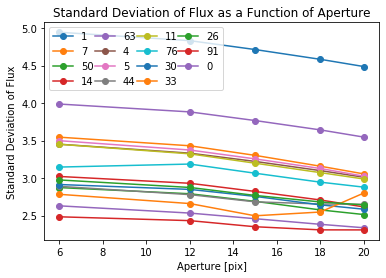

In [12]:
#pick an aperture using noise

aps = [6,12,15,18,20]
figure()#figsize = (8,8))
for s,IDD in zip(stars,ID):
    fluxes_api = []
    for i in arange(11,16):
        fluxes_api.append(log10(std(s[i])))
    plot(aps,fluxes_api,'o-',label = str(IDD))

xlabel('Aperture [pix]')
ylabel('Standard Deviation of Flux')
title('Standard Deviation of Flux as a Function of Aperture')
legend(fancybox = True, loc = 'best',ncol = 4,columnspacing = 0.1)
savefig('ap_select2.png')
show()

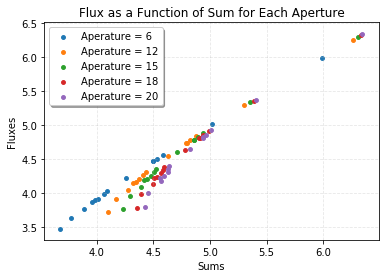

In [13]:
#pick an aperture using noise/flux

aps = [6,12,15,18,20]
figure()#figsize = (10,10))
for i in range(len(aps)):
        
    fluxes = [mean(s[11+i]) for s in stars]
    sums = [mean(s[i]) for s in stars]
    scatter(log10(sums),log10(fluxes),label = 'Aperature = '+str(aps[i]),s = 15)

xlabel('Sums')
ylabel('Fluxes')
title('Flux as a Function of Sum for Each Aperture')
legend(fancybox = True,shadow = True)
grid(linestyle  = '--', alpha = 0.3)
savefig('ap_select1.png')
show()

## Analyzing Aperature 20

In [14]:
#calculate sigmas

sums_ap20,fluxs_ap20,areas_ap20,msky = [],[],[],[]

for s in stars:
    sums_ap20.append(s[4])
    areas_ap20.append(s[9])
    fluxs_ap20.append(s[15])
    msky.append(s[10])
    
msky_avgs = [mean(m) for m in msky]

flux_ap20_avgs = [mean(f) for f in fluxs_ap20]
sigma_o = [std(f)/sqrt(len(f)) for f in fluxs_ap20]
flux_ap20_std = [std(f) for f in fluxs_ap20]

sum_ap20_avgs = [mean(s) for s in sums_ap20]
sigma_os = [std(s)/sqrt(len(s)) for s in sums_ap20]
sum_ap20_std = [std(s) for s in sums_ap20]

area_ap20_avgs = [mean(a) for a in areas_ap20]
area_ap20_std = [std(a) for a in areas_ap20]
sigma_a = [std(a) for a in areas_ap20]

sigma_s = [std(m)/len(m) for m in msky]

#Method 2 using quadratic formula
sigma_o_quad = sqrt(array(sigma_s)**2+array(sigma_os)**2+array(sigma_a)**2)

#observe the difference for the second star
print(sigma_o[1])
print(sigma_o_quad[1])
print(sigma_o_quad-sigma_o)
print(mean(sigma_o_quad-sigma_o))
print(mean(sigma_o_quad-sigma_os))

204.23851747275538
1114.9435592737295
[  81.65696831  910.7050418  1050.63193781 1006.12828096 1036.68263242
  985.0818755   945.8016052  1054.74525213  982.83274298 1010.27388346
 1070.70580121 1010.19645321 1045.07506841 1087.50472852  527.06930254]
920.3394382988458
5.0557746150540575e-05


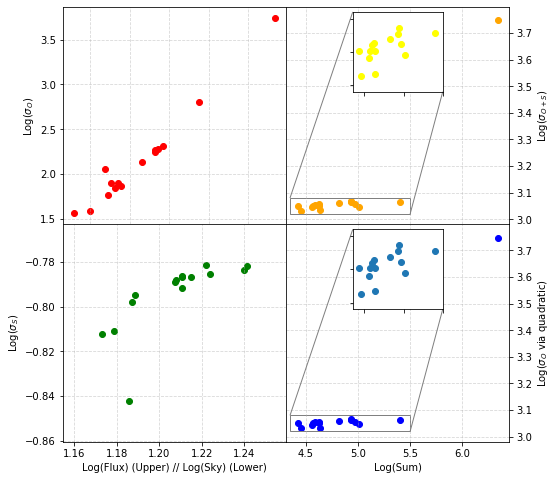

In [16]:
fig, [(ax1,ax2),(ax3,ax4)] = plt.subplots(2,2,figsize = (8,8),sharey = False,gridspec_kw={'hspace': 0,'wspace':0})

#ax1.set_title('                                                          \
#Noise Relationships')

ax1.set_xlabel('Log(Flux)')
ax1.set_ylabel('Log($\sigma_{O}$)')
ax1.scatter(log10(flux_ap20_avgs),log10(sigma_o),c = 'red')
ax1.grid(linestyle = '--', alpha = 0.5)

ax2.set_xlabel('Log(Sum)')
ax2.set_ylabel('Log($\sigma_{O+S}$)')
ax2.scatter(log10(sum_ap20_avgs),log10(sigma_os),c = 'orange')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.grid(linestyle = '--', alpha = 0.5)

axins = zoomed_inset_axes(ax2, 5, loc=9, axes_kwargs = {'xlim' : (4.35, 5.5),'ylim':(3.02,3.08), 'aspect': 17})
axins.plot(log10(sum_ap20_avgs[1:]), log10(sigma_os[1:]),'o', color = 'yellow')
mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.yticks(visible=False)
plt.xticks(visible=False)

ax3.set_xlabel('Log(Flux) (Upper) // Log(Sky) (Lower)')
ax3.set_ylabel('Log($\sigma_{S}$)')
ax3.scatter(log10(msky_avgs),log10(sigma_s),c = 'green')
ax3.grid(linestyle = '--', alpha = 0.5)

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax4.set_xlabel('Log(Sum)')
ax4.set_ylabel('Log($\sigma_{O}$ via quadratic)')
ax4.scatter(log10(sum_ap20_avgs),log10(sigma_o_quad),c = 'blue')
ax4.grid(linestyle = '--', alpha = 0.5)

axins = zoomed_inset_axes(ax4, 5, loc=9, axes_kwargs = {'xlim' : (4.35, 5.5),'ylim':(3.02,3.08), 'aspect': 17})
axins.plot(log10(sum_ap20_avgs[1:]), log10(sigma_o_quad[1:]),'o')
mark_inset(ax4, axins, loc1=2, loc2=4, fc="none", ec="0.5")
yticks(visible=False)
xticks(visible=False)

plt.savefig('noise_plots.png')
show()

In [17]:
#compute signal to noise ratio
SNR = array(flux_ap20_avgs) / array(sigma_o)

In [24]:
#for plotting noise relation
xx = linspace(min(flux_ap20_avgs),max(flux_ap20_avgs),1000)
yy = xx

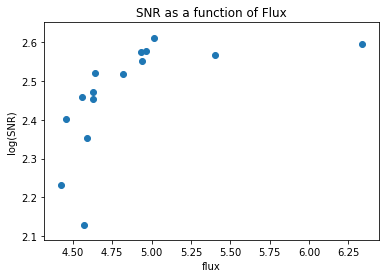

In [18]:
figure()
xlabel('flux')
ylabel('log(SNR)')
title('SNR as a function of Flux')
scatter(log10(sum_ap20_avgs),log10(SNR))
show()

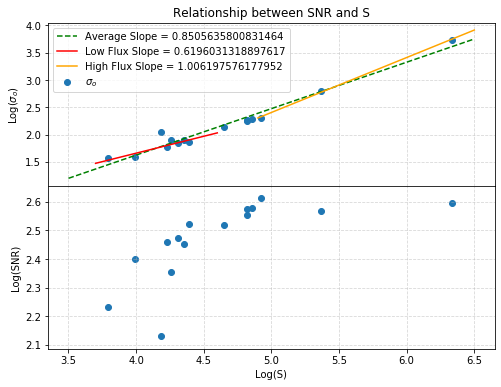

In [20]:
#plot SNR vs S and N vs S

xx = linspace(10**3.5,10**6.5,1000)

#fit average
x1 = linspace(3.5,6.5,1000)
c1 = polyfit(log10(flux_ap20_avgs),log10(sigma_o),1)
y1 = c1[1] + c1[0]*x1

#fit first regime
x2 = linspace(3.7,4.6,1000)
args = argsort(array(flux_ap20_avgs))
f_tmp = list(array(flux_ap20_avgs)[args][:2])+list(array(flux_ap20_avgs)[args][3:8])
s_tmp = list(array(sigma_o)[args][:2])+list(array(sigma_o)[args][3:8])
c2 = polyfit(log10(f_tmp),log10(s_tmp),1)
y2 = c2[1] + c2[0]*x2

#fit second regime
x3 = linspace(4.9,6.5,1000)
args = argsort(array(flux_ap20_avgs))
f_tmp = array(flux_ap20_avgs)[args][12:]
s_tmp = array(sigma_o)[args][12:]
c3 = polyfit(log10(f_tmp),log10(s_tmp),1)
y3 = c3[1] + c3[0]*x3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6),sharex = True,gridspec_kw={'hspace': 0})

ax1.set_xlabel('Log(Flux)')
ax1.set_ylabel('Log($\sigma_o$)')
ax1.scatter(log10(flux_ap20_avgs),log10(sigma_o), label = "$\sigma_o$")
ax1.plot(x1,y1,'g--',label = 'Average Slope = {}'.format(c1[0]))
ax1.plot(x2,y2,'r',label = 'Low Flux Slope = {}'.format(c2[0]))
ax1.plot(x3,y3,'orange',label = 'High Flux Slope = {}'.format(c3[0]))
ax1.legend(fancybox = True)
ax1.grid(linestyle = '--', alpha = 0.5)

ax1.set_title('Relationship between SNR and S')
ax2.set_ylabel('Log(SNR)')
ax2.set_xlabel('Log(S)')
ax2.scatter(log10(flux_ap20_avgs),log10(SNR),label = 'SNR')
ax2.grid(linestyle = '--', alpha = 0.5)

plt.savefig('snr-s.png')
show()

In [21]:
#data from slides

#ID = [1,7,50,14,63,4,5,44,11,76,30,33,26,91,0,0]
V = [9.885,11.7052,13.148,12.394,13.352,11.643,11.664,13.120,11.966,13.644,12.956,12.991,12.833,14.101,0,0]
V = array(V)
VmR = [0,0.883,0.634,0.310,0.292,0.507,0.6581,0.617,0.800,0.612,0.564,0.218,0.583,0.570,0,0]
VmR = array(VmR)
R = V-VmR
#remove ones without data
R=R[1:-2]
V=V[1:-2]

len(R)

13

In [23]:
flux_ap20_avgs_adj = flux_ap20_avgs[1:-1]# first one- no data.. last two-- no data but one had missing txt file

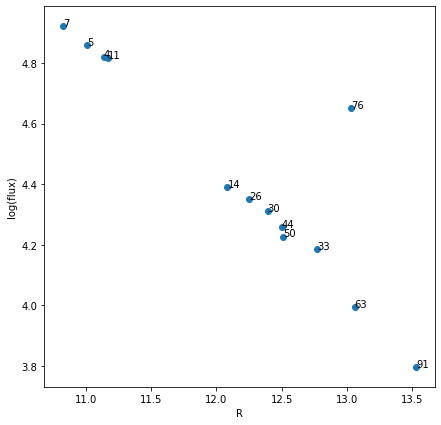

In [24]:
plt.figure(figsize = (7,7))
plt.scatter(R,log10(flux_ap20_avgs_adj))
xlabel('R')
ylabel('log(flux)')

for i, IIDD in zip(range(len(R)), ID[1:-2]):
    plt.text(R[i], log10(flux_ap20_avgs_adj[i]), str(IIDD))

plt.show()

In [25]:
#get rid of star 76
R_adjusted = list(R[:8])+list(R[9:])
V_adjusted = list(V[:8])+list(V[9:])
flux20_adjusted = flux_ap20_avgs_adj[:8]+flux_ap20_avgs_adj[9:]
id_adj = ID[1:9]+ID[10:-2]
print(R_adjusted)
print(len(R_adjusted))
print(id_adj)
print(len(id_adj))

[10.822199999999999, 12.514, 12.084, 13.06, 11.136000000000001, 11.0059, 12.503, 11.165999999999999, 12.392, 12.773, 12.25, 13.531]
12
[7, 50, 14, 63, 4, 5, 44, 11, 30, 33, 26, 91]
12


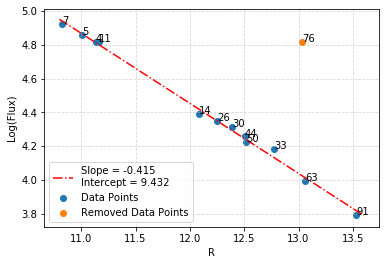

In [26]:
#fit a linear slope to the data, ignore star 76 -- obviously something went wrong

figure()#figsize = (7,7))
scatter(R_adjusted,log10(flux20_adjusted), label  = 'Data Points')
xlabel('R')
ylabel('Log(Flux)')

for i, idd in zip(range(len(id_adj)), id_adj):
    plt.text(R_adjusted[i], log10(flux20_adjusted[i]), str(idd))
    
c = polyfit(R_adjusted, log10(flux20_adjusted),1)
x = linspace(10.8,13.6,1000)
y = c[1] + c[0]*x

plot(x,y,'r-.',label = "Slope = {} \nIntercept = {}".format(c[0].round(3),c[1].round(3)) )
scatter(R[8],log10(flux_ap20_avgs[8]), label = 'Removed Data Points')
text(R[8], log10(flux_ap20_avgs[8]), str(76))
legend(fancybox = True)
grid(linestyle='--',alpha = 0.5 )
savefig('magnitude_fit.png')
show()

In [29]:
print('The slope of the line is {}'.format(c[0]))
print('The intercept of the line is {}'.format(c[1]))

The slope of the line is -0.4148446484585011
The intercept of the line is 9.431710828522686


In [32]:
def R_val(flux):
    f = flux/0.435**2
    return (log10(f)-c[1])/c[0]

In [33]:
R_val(mean(msky))

18.0823862623741

In [34]:
mean(msky)

16.11788935483871

In [35]:
#signal to noise relationship

def SN(f,A,s,msky):
    
    g = 3
    t = 2
    #t = 71.8 #this makes the relationship work

    top = f*g*t/2
    bot1 = top
    bot2 = msky*g*A*t/2
    bot3 = (s*g)**2*A
    bot = sqrt(bot1+bot2+bot3)
    
    return top/bot

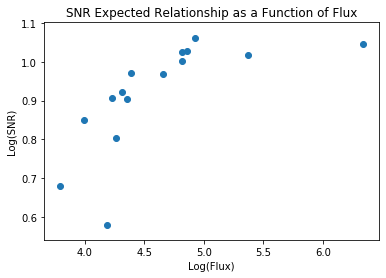

In [38]:
SNR_rel = []
for f,A,s,m in zip(flux_ap20_avgs,area_ap20_avgs,sigma_o,msky):
    SNR_rel.append(SN(f,A,s,mean(m)))  
    
figure()
xlabel('Log(Flux)')
ylabel('Log(SNR)')
title('SNR Expected Relationship as a Function of Flux')
scatter(log10(flux_ap20_avgs),log10(SNR_rel))
show()

In [37]:
mean(SNR_rel-SNR)

-297.84531756949525

In [40]:
#rearrange theoretical SNR for t
def exposure_t(f,Area,s,msky,snr):
    
    g = 3

    A = f*g/2
    B = msky*g*Area/2
    C = (s*g)**2*Area
    
    a = A**2
    b = -1*(A+B)*(snr**2)
    c = -1*C*(snr**2)
    
    t = (-1*b+sqrt(b**2-(4*a*c)))/(2*a)
    
    return t

def inverse_R_val(R):
    f = c[0]*R+c[1]
    flux = 10**f
    return flux

def R_val2(flux):
    f = flux 
    return (log10(f)-c[1])/c[0]

In [41]:
snrs = [10,20,50,100]

R_VAL = 20
FLUX = inverse_R_val(R_VAL)
AREA = mean(areas_ap20)
SIGMA = mean(sigma_o) #wrong sigma?
SIGMA = 1.357
MSKY = mean(msky)

for SNRS in snrs:
    print(str(exposure_t(FLUX,AREA,SIGMA,MSKY,SNRS).round(1))+' sec')

7264.7 sec
29056.8 sec
181601.4 sec
726403.6 sec


In [70]:
print(str(exposure_t(inverse_R_val(16.27162),AREA,SIGMA,MSKY,100).round(2))+' sec')

600.0 sec


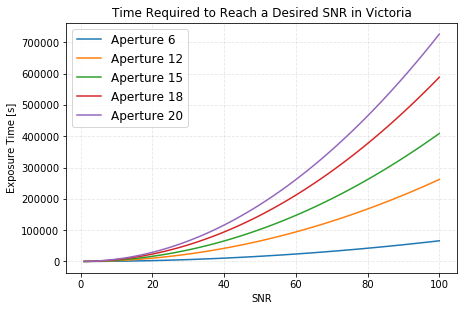

In [42]:
#repeat for all aperature sizes

fluxs_ap6,areas_ap6,fluxs_ap12,areas_ap12,fluxs_ap15,\
areas_ap15,fluxs_ap18,areas_ap18 = [],[],[],[],[],[],[],[]

for s in stars:
    areas_ap6.append(s[5])
    fluxs_ap6.append(s[11])
    areas_ap12.append(s[6])
    fluxs_ap12.append(s[12])
    areas_ap15.append(s[7])
    fluxs_ap15.append(s[13])
    areas_ap18.append(s[8])
    fluxs_ap18.append(s[14])
    
fluxs_ap = [fluxs_ap6,fluxs_ap12,fluxs_ap15,fluxs_ap18,fluxs_ap20]
areas_ap = [areas_ap6,areas_ap12,areas_ap15,areas_ap18,areas_ap20]

sigma_o_ap  = []
for fluxs in fluxs_ap:
    sigma_o_ap.append([std(f)/sqrt(len(fluxs)) for f in fluxs])

snrs = [10,20,50,100]
snrs = linspace(1,100,100)
MSKY = mean(msky)
R_VAL = 20
FLUX = inverse_R_val(R_VAL)

figure(figsize = (7,4.6))
title('Time Required to Reach a Desired SNR in Victoria')
xlabel('SNR')
ylabel('Exposure Time [s]')
#xlim(0,100)
#ylim(0,7.3e5)

for f_ap,a_ap,s_ap,ap in zip(fluxs_ap,areas_ap,sigma_o_ap,aps):
    
    AREA = mean(a_ap)
    SIGMA = 1.357 #wrong sigma?
    
    t_tmp = []
    for SNRS in snrs:
        t_tmp.append(exposure_t(FLUX,AREA,SIGMA,MSKY,SNRS))
    
    plot(snrs,t_tmp,'-',label = 'Aperture '+str(ap))

grid(linestyle  = '--', alpha = 0.3)
legend(fancybox = True,fontsize = 12)
savefig('snr-expt.png')
show()

In [43]:
#from first principles question

area5 = mean(s5[9])#pix   #for ap 20

area_convert = 0.00135 #cm/pix

A = area5 * area_convert**2 #cm**2 

flux5 = mean(s5[15]) #DU    #aperture 20

g = 3

phot = flux5*g

t = 2 #s

lam = 6000 #A #R-band peaks at 6000A

countrate = phot/t/area5/lam #phot

countrate

0.0019636688513279196

In [44]:
j = R_val2(mean(s5[15]))

In [45]:
l = 2.512**j*3

In [46]:
1000/l

0.0019049171452327656